In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
df_train=pd.read_csv('Yes_Bank_Train.csv')
df_test=pd.read_csv('Yes_Bank_Test_int.csv')


In [4]:
def display_all(df):
    with pd.option_context("display.max_rows",50,"display.max_columns",60):
        display(df)
display_all(df_train)        

,serial number,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,7,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,8,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,9,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,10,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df_train)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [7]:
target=df_train['credit_amount']
df_train.drop(['credit_amount'],axis=1,inplace=True)

In [8]:
df_train.columns

Index(['serial number', 'account_info', 'duration_month', 'credit_history',
       'purpose', 'savings_account', 'employment_st', 'poi', 'personal_status',
       'gurantors', 'resident_since', 'property_type', 'age',
       'installment_type', 'housing_type', 'credits_no', 'job_type', 'liables',
       'telephone', 'foreigner'],
      dtype='object')

In [9]:
def make_age_categories(df):
    for i in range(df.shape[0]):
        if(df['age'].iloc[i]>=19 and df['age'].iloc[i]<30):
            df['age'].iloc[i]='18-30'
        elif(df['age'].iloc[i]>=30 and df['age'].iloc[i]<50):
            df['age'].iloc[i]='30-50'
        elif(df['age'].iloc[i]>=50 and df['age'].iloc[i]<80):
            df['age'].iloc[i]='50-80'

In [10]:
make_age_categories(df_train)

In [11]:
make_age_categories(df_test)

In [12]:
def make_duration_category(df):
    for i in range(df.shape[0]):
        if(df['duration_month'].iloc[i]>=1 and df['duration_month'].iloc[i]<6):
            df['duration_month'].iloc[i]='<6mo'
            continue
        elif(df['duration_month'].iloc[i]>=6 and df['duration_month'].iloc[i]<12):
            df['duration_month'].iloc[i]='>6mo<1yr'
            continue
        elif(df['duration_month'].iloc[i]>=12 and df['duration_month'].iloc[i]<24):
            df['duration_month'].iloc[i]='>1yr<2yr'
            continue
        elif(df['duration_month'].iloc[i]>=24 and df['duration_month'].iloc[i]<36):
            df['duration_month'].iloc[i]='>2yr<3yr'
            continue
        elif(df['duration_month'].iloc[i]>=36 and df['duration_month'].iloc[i]<=72):
            df['duration_month'].iloc[i]='>3yr'
            continue
   
            
    

In [13]:
make_duration_category(df_test)


In [14]:
make_duration_category(df_train)

In [15]:
data_dummies=pd.get_dummies(df_train)
data_dummies_test=pd.get_dummies(df_test)


In [16]:
data_dummies.drop(['serial number'],inplace=True,axis=1)


In [17]:
data_dummies_copy=data_dummies.copy()

In [18]:
def plot_corr(df,size=15):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

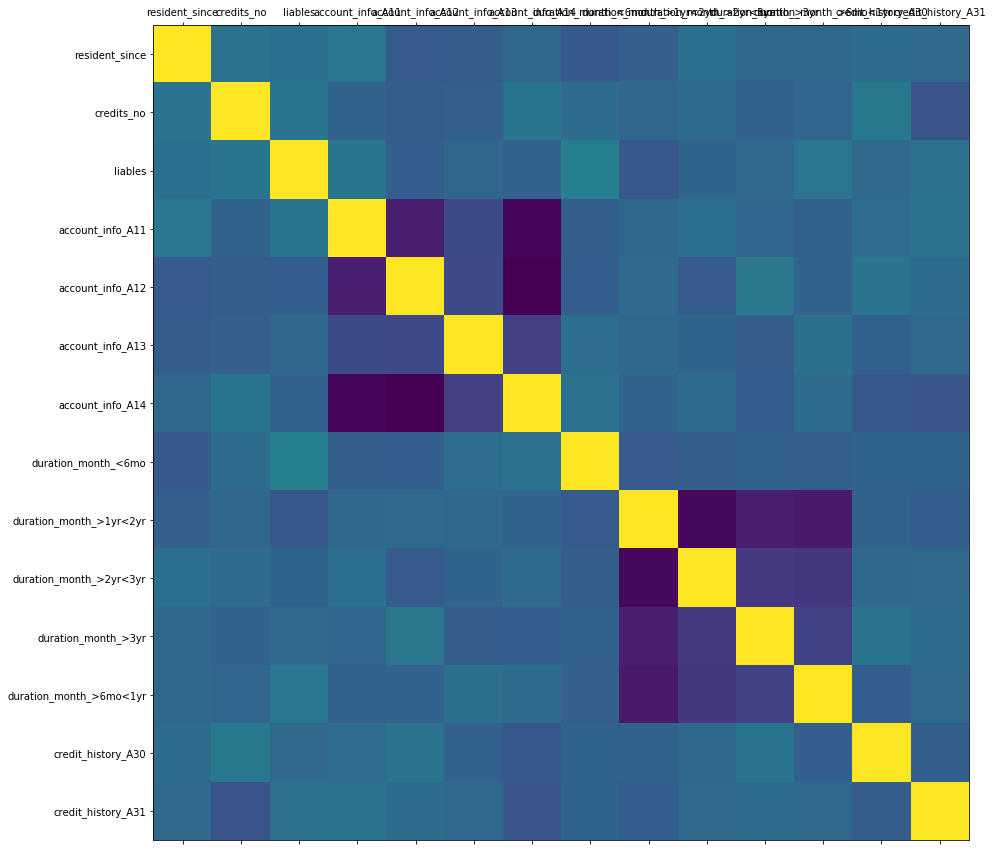

In [19]:
plot_corr(data_dummies.iloc[:,1:15])

In [20]:
data_dummies.drop(['duration_month_>2yr<3yr','account_info_A14'],inplace=True,axis=1)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(data_dummies,target,test_size=0.25,random_state=0)


In [22]:
data_dummies_test.drop(['duration_month_>2yr<3yr','account_info_A14'],inplace=True,axis=1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,max_features='sqrt',oob_score=True)
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
print(rf.score(X_train,y_train))

0.38752769815656035
0.933616061110171


In [24]:
rf.oob_score_

0.5016827955816303

In [25]:
from sklearn.linear_model import LassoCV,LinearRegression,Ridge,Lasso,RidgeCV
m = LassoCV().fit(X_train, y_train)
print(m.score(X_train,y_train))
print(m.score(X_test,y_test))


0.5757717097959196
0.3906131678176139


In [26]:
m2 = LassoCV(eps=0.006,n_alphas=200).fit(X_train, y_train)
print(m2.score(X_train,y_train))
print(m2.score(X_test,y_test))

0.5761029043148349
0.390726562224904


In [27]:
def rmse(ypred,yact):
    return np.sqrt(np.sum(np.square(y_pred-yact)))

In [28]:
sno=data_dummies_test['serial number']
data_dummies_test=data_dummies_test.drop(['serial number'],axis=1)

In [52]:
y_pred=m2.predict(data_dummies_test).astype(int)

In [53]:
submission=pd.DataFrame(y_pred)

In [54]:
submission['serial number']=pd.DataFrame(sno)

In [55]:
submission['credit_amount']=pd.DataFrame(y_pred)

In [56]:
print(submission[submission.iloc[:,0]<1000].count())
submission[submission.iloc[:,0]>4000].count()

0                11
serial number    11
credit_amount    11
dtype: int64


0                61
serial number    61
credit_amount    61
dtype: int64

In [57]:
for i in range(submission.shape[0]):
    if(submission['credit_amount'].iloc[i]>=4000 and submission['credit_amount'].iloc[i]<20000):
        submission['credit_amount'].iloc[i]=1
    elif(submission['credit_amount'].iloc[i]>=1500 and submission['credit_amount'].iloc[i]<4000):
        submission['credit_amount'].iloc[i]=2
    elif(submission['credit_amount'].iloc[i]<1500):
        submission['credit_amount'].iloc[i]=3

In [59]:
submission.to_csv('best.csv')